# Uso de Técnicas de Machine Learning prar criar modelos capazer de prever o preço da Soja Brasileira em US$ / BU 


## 1. Introdução


A precificação de commodities agrícolas, como a soja, é um desafio complexo devido à sua natureza volátil e à influência de múltiplos fatores globais e locais. Para produtores, investidores e outros agentes do agronegócio, a capacidade de prever os preços da soja é fundamental para o planejamento estratégico, a gestão de riscos e a otimização de resultados.

Este projeto tem como objetivo desenvolver e avaliar modelos de Machine Learning para a previsão do preço da soja (em US$/BU), utilizando um conjunto de dados que abrange variáveis macroeconômicas, de produção e logística.

A análise se inicia com a exploração dos dados e a criação de um modelo de referência utilizando a Regressão Linear, uma técnica consolidada e altamente interpretável. A partir dos resultados deste primeiro modelo, investigaremos suas limitações e exploraremos abordagens mais avançadas para aprimorar a precisão e a robustez da previsão.

## 2. Desenvolvimento


### 2.1 Sample


   * Coleta das séries históricas listadas (a–p).
   * Definição de janelas temporais comuns (1990–2025, por exemplo).
   * Partição entre treino, validação e teste.






Função base para criar dataset:

In [1]:

import pandas as pd
import numpy as np 

# Funções base para criar um dataframe:

# 1) Para os dados que já estão em formato mensal:
def load_monthly_csv(path, filename, date_col, value_col, date_format='%d.%m.%Y'):
    full_path = f"{path}\\{filename}"
    df = pd.read_csv(full_path, sep=',')
    df[date_col] = pd.to_datetime(df[date_col], format=date_format)
    df.set_index(date_col, inplace=True)
    df = df[[value_col]].copy()
    df[value_col] = (
        df[value_col]
        .astype(str)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )
    df = df.resample('MS').mean()
    return df

# 2) Para os dados que estão em formato anual (Safra) da Produção de Soja:
def annual_to_production_soy(df_annual, value_col, month_alias='M'):
    df = df_annual.copy()
    df.index = pd.to_datetime(df.index.astype(str) + "-06-30")  # centraliza em junho
    # Cria um DataFrame mensal com os mesmos anos
    monthly_index = pd.date_range(start=df.index.min().replace(month=1), 
                            end=df.index.max().replace(month=12), freq='MS')
    df_monthly = pd.DataFrame(index=monthly_index)
    for year in df.index.year:
        if year in df.index.year:
            value = df.loc[df.index.year == year, value_col].values[0]
            for month in range(1, 13):
                date = pd.Timestamp(year=year, month=month, day=1)
                if date in df_monthly.index:
                    df_monthly.loc[date, value_col] = value * soy_harvest_weights.get(month, 0)
    df_monthly[value_col] = df_monthly[value_col].fillna(0)
    return df_monthly
# pesos em fração
soy_harvest_weights = {
    1: 0.15,   # jan
    2: 0.35,   # fev
    3: 0.30,   # mar
    4: 0.10,   # abr
    5: 0.03,   # mai
    6: 0.02,   # jun
    7: 0.015,  # jul
    8: 0.01,   # ago
    9: 0.01,   # set
    10: 0.005, # out
    11: 0.005, # nov
    12: 0.005  # dez
}

# 3) Para os dados que estão em formato anual (Safra) de Plantio de Soja:
def annual_to_planting_soy(df_annual, value_col, month_alias='M'):
    df = df_annual.copy()
    df.index = pd.to_datetime(df.index.astype(str) + "-06-30")  # centraliza em junho
    # Cria um DataFrame mensal com os mesmos anos
    monthly_index = pd.date_range(start=df.index.min().replace(month=1), 
                            end=df.index.max().replace(month=12), freq='MS')
    df_monthly = pd.DataFrame(index=monthly_index)
    for year in df.index.year:
        if year in df.index.year:
            value = df.loc[df.index.year == year, value_col].values[0]
            for month in range(1, 13):
                date = pd.Timestamp(year=year, month=month, day=1)
                if date in df_monthly.index:
                    df_monthly.loc[date, value_col] = value * soy_planting_weights.get(month, 0)
    df_monthly[value_col] = df_monthly[value_col].fillna(0)
    return df_monthly
# pesos em fração 
soy_planting_weights = {
    1: 0.00,  # jan
    2: 0.00,  # fev
    3: 0.00,  # mar
    4: 0.00,  # abr
    5: 0.00,  # mai
    6: 0.00,  # jun
    7: 0.00,  # jul
    8: 0.00,  # ago
    9: 0.10,  # set
    10: 0.50, # out
    11: 0.30, # nov
    12: 0.10  # dez
}

# 4) Para os dados que estão em formato anual (Safra) da Produção de Milho:
def annual_to_production_corn(df_annual, value_col, month_alias='M'):
    df = df_annual.copy()
    df.index = pd.to_datetime(df.index.astype(str) + "-06-30")  # centraliza em junho
    # Cria um DataFrame mensal com os mesmos anos
    monthly_index = pd.date_range(start=df.index.min().replace(month=1), 
                            end=df.index.max().replace(month=12), freq='MS')
    df_monthly = pd.DataFrame(index=monthly_index)
    for year in df.index.year:
        if year in df.index.year:
            value = df.loc[df.index.year == year, value_col].values[0]
            for month in range(1, 13):
                date = pd.Timestamp(year=year, month=month, day=1)
                if date in df_monthly.index:
                    df_monthly.loc[date, value_col] = value * corn_harvest_weights.get(month, 0)
    df_monthly[value_col] = df_monthly[value_col].fillna(0)
    return df_monthly
corn_harvest_weights = {
    1: 0.005,  # jan
    2: 0.020,  # fev
    3: 0.015,  # mar
    4: 0.005,  # abr
    5: 0.050,  # mai
    6: 0.300,  # jun
    7: 0.400,  # jul
    8: 0.150,  # ago
    9: 0.020,  # set
    10: 0.015, # out
    11: 0.010, # nov
    12: 0.005  # dez
}

# 5) Para os dados que estão em formato anual (Safra) de Plantio de Milho:
def annual_to_planting_corn(df_annual, value_col, month_alias='M'):
    df = df_annual.copy()
    df.index = pd.to_datetime(df.index.astype(str) + "-06-30")  # centraliza em junho
    # Cria um DataFrame mensal com os mesmos anos
    monthly_index = pd.date_range(start=df.index.min().replace(month=1), 
                            end=df.index.max().replace(month=12), freq='MS')
    df_monthly = pd.DataFrame(index=monthly_index)
    for year in df.index.year:
        if year in df.index.year:
            value = df.loc[df.index.year == year, value_col].values[0]
            for month in range(1, 13):
                date = pd.Timestamp(year=year, month=month, day=1)
                if date in df_monthly.index:
                    df_monthly.loc[date, value_col] = value * corn_planting_weights.get(month, 0)
    df_monthly[value_col] = df_monthly[value_col].fillna(0)
    return df_monthly
corn_planting_weights = {
    1: 0.20,  # jan
    2: 0.30,  # fev
    3: 0.20,  # mar
    4: 0.05,  # abr
    5: 0.00,  # mai
    6: 0.00,  # jun
    7: 0.00,  # jul
    8: 0.00,  # ago
    9: 0.05,  # set
    10: 0.12, # out
    11: 0.06, # nov
    12: 0.02  # dez
}

# 6) Para os dados que estão em formato anual (Safra) de Produção e Exportação da soja americana:
# Produção de Soja americana:
def annual_to_uss_prod(df_annual, value_col, month_alias='M'):
    df = df_annual.copy()
    df.index = pd.to_datetime(df.index.astype(str) + "-06-30")  # centraliza em junho
    # Cria um DataFrame mensal com os mesmos anos
    monthly_index = pd.date_range(start=df.index.min().replace(month=1), 
                            end=df.index.max().replace(month=12), freq='MS')
    df_monthly = pd.DataFrame(index=monthly_index)
    for year in df.index.year:
        if year in df.index.year:
            value = df.loc[df.index.year == year, value_col].values[0]
            for month in range(1, 13):
                date = pd.Timestamp(year=year, month=month, day=1)
                if date in df_monthly.index:
                    df_monthly.loc[date, value_col] = value * usa_soy_weights.get(month, 0)
    df_monthly[value_col] = df_monthly[value_col].fillna(0)
    return df_monthly
usa_soy_weights = {
    1: 0.04, 
    2: 0.03, 
    3: 0.025, 
    4: 0.02,
    5: 0.015, 
    6: 0.01, 
    7: 0.01, 
    8: 0.01,
    9: 0.15, 
    10: 0.50, 
    11: 0.18, 
    12: 0.01
}

# 7) Exportação de soja americana:
def annual_to_uss_export(df_annual, value_col, month_alias='M'):
    df = df_annual.copy()
    df.index = pd.to_datetime(df.index.astype(str) + "-06-30")  # centraliza em junho
    # Cria um DataFrame mensal com os mesmos anos
    monthly_index = pd.date_range(start=df.index.min().replace(month=1), 
                            end=df.index.max().replace(month=12), freq='MS')
    df_monthly = pd.DataFrame(index=monthly_index)
    for year in df.index.year:
        if year in df.index.year:
            value = df.loc[df.index.year == year, value_col].values[0]
            for month in range(1, 13):
                date = pd.Timestamp(year=year, month=month, day=1)
                if date in df_monthly.index:
                    df_monthly.loc[date, value_col] = value * usa_soy_export_weights.get(month, 0)
    df_monthly[value_col] = df_monthly[value_col].fillna(0)
    return df_monthly
usa_soy_export_weights = {
    1: 0.16, 
    2: 0.12, 
    3: 0.08, 
    4: 0.05,
    5: 0.04, 
    6: 0.03, 
    7: 0.025, 
    8: 0.025,
    9: 0.07, 
    10: 0.14, 
    11: 0.18, 
    12: 0.18
}

# 8) Para os dados de Importação ( Demanda ) que estão em formato anual (Safra): ( China, México e União Européia ):
def annual_to_monthly(df_annual, value_col, month_alias='M'):
    df = df_annual.copy()
    df.index = pd.to_datetime(df.index.astype(str) + "-06-30")  # centraliza em junho
    df_monthly = df.resample('MS').ffill().bfill()
    df_monthly[value_col] = df_monthly[value_col] / 12
    return df_monthly

# Caminho da base de dados:
base_path = r"D:\UERJ\Programação e Códicos\Apresentação_TMQUANT\Datasets"


# Criação das bases de forma individual:
## 1) Séries históricas da Soja do estado do MT: 
# a) soy_USD_hist - Preço histórico da soja na CBOT
soy_USD_hist = load_monthly_csv(base_path, "soy_USD_hist.csv", date_col="Data", value_col="Último" )

# b) soy_prod_mt_hist - Produção histórica da soja no Estado do Mato Grosso:
soy_prod_mt_hist = pd.read_excel(base_path + "\\soy_prod_mt_hist.xls", sheet_name="Sheet1")
soy_prod_mt_hist['Ano Agricola'] = soy_prod_mt_hist['Ano Agricola'].str[:4]  # ex.: '1990/91' → '1990'
soy_prod_mt_hist.set_index('Ano Agricola', inplace=True)
soy_prod_mt_hist = annual_to_production_soy(soy_prod_mt_hist, 'MATO-GROSSO/Producao (mil t)')

# c) soy_seed_co_hist - Área plantada histórica no Estado do Mato Grosso:
soy_seed_mt_hist = pd.read_excel(base_path + "\\soy_seed_mt_hist.xls", sheet_name="Sheet1")
soy_seed_mt_hist['Ano Agricola'] = soy_seed_mt_hist['Ano Agricola'].str[:4]  # ex.: '1990/91' → '1990'
soy_seed_mt_hist.set_index('Ano Agricola', inplace=True)
soy_seed_mt_hist = annual_to_planting_soy(soy_seed_mt_hist, 'MATO-GROSSO/Area Plantada (mil ha)')

# d) freight_mt_hist - Preço histórico do frete da soja para os portos de Itaibuba e Santos:
freight_mt_hist1 = load_monthly_csv(base_path, "freight_mt_hist.csv", date_col="Data", value_col="vlr_brl/ton_ITAITUBA")
freight_mt_hist2 = load_monthly_csv(base_path, "freight_mt_hist.csv", date_col="Data", value_col= "vlr_brl/ton_SANTOS")
freight_mt_hist = freight_mt_hist1.merge(freight_mt_hist2, left_index=True, right_index=True, how='outer')

# e) soy_export_mt_hit - Exportação histórica da Soja do estado de MT:
soy_export_mt_hit = load_monthly_csv(base_path, "soy_export_mt_hit.csv", date_col="Data", value_col="Mega Tonelada Líquido" )

## 2) Séries históricas do Milho do estado do MT:
# f) corn_USD_hist - Preço histórico do milho na CBOT:
corn_USD_hist = load_monthly_csv(base_path, "corn_USD_hist.csv", date_col="Data", value_col="Último")

# g) corn_prod_mt_hist - Produção histórica de milho no Estado do Mato Grosso::
corn_prod_mt_hist = pd.read_excel(base_path + "\\corn_prod_mt_hist.xls", sheet_name="Sheet1")
corn_prod_mt_hist['Ano Agricola'] = corn_prod_mt_hist['Ano Agricola'].str[:4]  # ex.: '1990/91' → '1990'
corn_prod_mt_hist.set_index('Ano Agricola', inplace=True)
corn_prod_mt_hist = annual_to_production_corn(corn_prod_mt_hist, 'MATO-GROSSO/Producao (mil t)')

# h) corn_seed_mt_hist - Área plantada histórica no Estado do Mato Grosso::
corn_seed_mt_hist = pd.read_excel(base_path + "\\corn_seed_mt_hist.xls", sheet_name="Sheet1")
corn_seed_mt_hist['Ano Agricola'] = corn_seed_mt_hist['Ano Agricola'].str[:4]  # ex.: '1990/91' → '1990'
corn_seed_mt_hist.set_index('Ano Agricola', inplace=True)
corn_seed_mt_hist = annual_to_planting_corn(corn_seed_mt_hist, 'MATO-GROSSO/Area Plantada (mil ha)')

## 3) Dados Macroeconômicos:
# i) gold_USD_hist - Preço histórico do ouro:
gold_USD_hist = load_monthly_csv(base_path, "gold_USD_hist.csv", date_col="Data", value_col="Último" )

# j) rate_nominal_USD - Taxa de Câmbio nominal ( BRL/Dólar ):
rate_nominal_USD = load_monthly_csv(base_path, "rate_nominal_USD.csv", date_col="Data", value_col="Último")

# l) Série histórica de Produção e Exportação de Soja americana:
# Produção:
soy_prod_us = pd.read_excel(base_path + "\\soy_prod_us_hist.xls", sheet_name="soy_prod_us_hist")
soy_prod_us['Ano Agricola'] = soy_prod_us['Ano Agricola'].str[:4]  # ex.: '1990/91' → '1990'
soy_prod_us.set_index('Ano Agricola', inplace=True)
soy_prod_us = annual_to_uss_prod(soy_prod_us,'Production (1000 MT)')
#Exportação:
soy_export_us = pd.read_excel(base_path + "\\soy_prod_us_hist.xls", sheet_name="soy_prod_us_hist")
soy_export_us['Ano Agricola'] = soy_export_us['Ano Agricola'].str[:4]  # ex.: '1990/91' → '1990'
soy_export_us.set_index('Ano Agricola', inplace=True)
soy_export_us = annual_to_uss_export(soy_export_us,'Exports (1000 MT)')
#União do Dataframe soy_prod_us_hist:
soy_prod_us_hist= soy_prod_us.merge(soy_export_us, left_index=True, right_index=True, how='outer')

# k) soy_imp_ch_hist - Demanda de importação de farinha de soja para a China:
soy_imp_ch_hist = pd.read_excel(base_path + "\\soy_imp_ch_hist.xls", sheet_name="soy_imp_ch_hist")
soy_imp_ch_hist['Ano Agricola'] = soy_imp_ch_hist['Ano Agricola'].str[:4]  # ex.: '1990/91' → '1990'
soy_imp_ch_hist.set_index('Ano Agricola', inplace=True)
soy_imp_ch_hist = annual_to_monthly(soy_imp_ch_hist, 'Import (1000 MT)')

# m) soy_imp_mex_hist - Demanda de importação de farinha de soja para o México:
soy_imp_mex_hist = pd.read_excel(base_path + "\\soy_imp_mex_hist.xls", sheet_name="soy_imp_ch_hist")
soy_imp_mex_hist['Ano Agricola'] = soy_imp_mex_hist['Ano Agricola'].str[:4]  # ex.: '1990/91' → '1990'
soy_imp_mex_hist.set_index('Ano Agricola', inplace=True)
soy_imp_mex_hist = annual_to_monthly(soy_imp_mex_hist, 'Import (1000 MT)')

# n) soy_imp_ue_hist - Demanda de importação de farinha de soja para a União Européia:
soy_imp_ue_hist = pd.read_excel(base_path + "\\soy_imp_ue_hist.xls", sheet_name="soy_imp_ch_hist")
soy_imp_ue_hist['Ano Agricola'] = soy_imp_ue_hist['Ano Agricola'].str[:4]  # ex.: '1990/91' → '1990'
soy_imp_ue_hist.set_index('Ano Agricola', inplace=True)
soy_imp_ue_hist = annual_to_monthly(soy_imp_ue_hist, 'Import (1000 MT)')


# ) climate_hist - Dados históricos de temperatura ( índice de umidade e temperatura média mensal ) ( Sorriso - MT, Sinop - MT e Nova Maringa - MT )
temp_hist = load_monthly_csv(base_path, "climate_hist.csv", date_col="Data Medicao", value_col="TEMPERATURA MEDIA MEDIA (°C)" )
preci_hist = load_monthly_csv(base_path, "climate_hist.csv", date_col="Data Medicao", value_col="PRECIPITACAO TOTAL MEDIA (mm)" )
climate_hist = temp_hist.merge(preci_hist, left_index=True, right_index=True, how='outer')
climate_hist = climate_hist.fillna(climate_hist.mean())

print("Dataframe unificado criado!")

Dataframe unificado criado!


Criação do dataframe unificado:

In [2]:

## Criação do dataframe unificado:
df = pd.concat([
    soy_USD_hist.rename(columns={'Último': 'soy_USD'}),
    corn_USD_hist.rename(columns={'Último': 'corn_USD'}),
    soy_prod_mt_hist.rename(columns={'MATO-GROSSO/Producao (mil t)': 'soy_production (mil T)'}),
    soy_seed_mt_hist.rename(columns={
'MATO-GROSSO/Area Plantada (mil ha)': 'soy_planting (mil ha)'}),
	#freight_mt_hist.rename(columns={        
	#'vlr_brl/ton_ITAITUBA': 'vl_BRL/Ton - Itaituba',
    #    'vlr_brl/ton_SANTOS': 'vl_BRL/Ton - Santos'
    #}),
	soy_export_mt_hit.rename(columns={'Mega Tonelada Líquido': 'Export (MTon)'}),
    corn_prod_mt_hist.rename(columns={'MATO-GROSSO/Producao (mil t)': 'corn_production'}),
    corn_seed_mt_hist.rename(columns={'MATO-GROSSO/Area Plantada (mil ha)': 'corn_planting'}),
    gold_USD_hist.rename(columns={'Último': 'gold_USD'}),
    rate_nominal_USD.rename(columns={'Último': 'rate_USD'}),

soy_prod_us_hist.rename(columns={
        'Production (1000 MT)': 'Production (1000 MTon) - US',
        'Exports (1000 MT)': 'Exports (1000 MTon) - US',
}),
    soy_imp_ch_hist.rename(columns={'Import (1000 MT)': 'chi_import'}),
    soy_imp_mex_hist.rename(columns={'Import (1000 MT)': 'mex_import'}),
    soy_imp_ue_hist.rename(columns={'Import (1000 MT)': 'ue_import'}),

climate_hist.rename(columns={
        'TEMPERATURA MEDIA MEDIA (°C)': 'avg_temperature(°C)',
        'PRECIPITACAO TOTAL MEDIA (mm)': 'avg_precipitation(mm)'
    }),
], axis=1)

#df = df[df.index >= '2005-01-01']
df = df.dropna()
df.head(13)

,soy_USD,corn_USD,soy_production (mil T),soy_planting (mil ha),Export (MTon),corn_production,corn_planting,gold_USD,rate_USD,Production (1000 MTon) - US,Exports (1000 MTon) - US,chi_import,mex_import,ue_import,avg_temperature(°C),avg_precipitation(mm)
2003-01-01,564.00,240.25,2251.350,0.0,179592835.0,17.230,194.20,369.1,3.5040,1318.120,750.40,0.000000,57.666667,1719.416667,24.8,136.066942
2003-02-01,577.00,233.25,5253.150,0.0,148149072.0,68.920,291.30,350.3,3.5700,988.590,562.80,0.000000,57.666667,1719.416667,25.0,259.800000
2003-03-01,574.50,237.00,4502.700,0.0,42067363.0,51.690,194.20,336.9,3.3640,823.825,375.20,0.000000,57.666667,1719.416667,25.7,275.200000
2003-04-01,623.50,231.25,1500.900,0.0,730561236.0,17.230,48.55,339.4,2.9110,659.060,234.50,0.000000,57.666667,1719.416667,25.7,172.700000
2003-05-01,624.50,243.00,450.270,0.0,658435036.0,172.300,0.00,365.6,2.9735,494.295,187.60,0.000000,57.666667,1719.416667,24.8,15.900000
2003-06-01,621.25,223.75,300.180,0.0,388201656.0,1033.800,0.00,346.3,2.8370,329.530,140.70,0.000000,57.666667,1719.416667,24.5,0.000000
2003-07-01,532.50,212.00,225.135,0.0,330800968.0,1378.400,0.00,355.8,2.9675,329.530,117.25,1.583333,66.000000,1844.000000,23.9,0.000000
2003-08-01,595.00,241.75,150.090,0.0,633800697.0,516.900,0.00,376.8,2.9785,329.530,117.25,1.583333,66.000000,1844.000000,25.8,0.000000
2003-09-01,677.25,228.75,150.090,524.0,649816667.0,68.920,48.55,386.1,2.8925,4942.950,328.30,1.583333,66.000000,1844.000000,26.6,57.800000
2003-10-01,794.25,252.50,75.045,2620.0,485599909.0,51.690,116.52,384.6,2.8665,16476.500,656.60,1.583333,66.000000,1844.000000,25.9,196.600000


### 2.2 Explore (EDA)


   * Análise exploratória (visualização, estatísticas básicas, correlação) entre preço da soja e demais variáveis.
   * Verificação de outliers, sazonalidades e tendências.



In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%pip install missingno
import missingno as msno

# Ajustes visuais
sns.set_style('dark')
sns.set_palette('tab10')


Informações gerais dos dados:

In [4]:

display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2003-01-01 to 2024-12-01
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   soy_USD                      262 non-null    float64
 1   corn_USD                     262 non-null    float64
 2   soy_production (mil T)       262 non-null    float64
 3   soy_planting (mil ha)        262 non-null    float64
 4   Export (MTon)                262 non-null    float64
 5   corn_production              262 non-null    float64
 6   corn_planting                262 non-null    float64
 7   gold_USD                     262 non-null    float64
 8   rate_USD                     262 non-null    float64
 9   Production (1000 MTon) - US  262 non-null    float64
 10  Exports (1000 MTon) - US     262 non-null    float64
 11  chi_import                   262 non-null    float64
 12  mex_import                   262 non-null    float64
 13  u

None

Descrição dos dados:

In [5]:

display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
soy_USD,262.0,1.055958e+03,2.960826e+02,5.147500e+02,8.787500e+02,1.012880e+03,1.308625e+03,1.754370e+03
corn_USD,262.0,4.354714e+02,1.525320e+02,2.017500e+02,3.503750e+02,3.901250e+02,5.421875e+02,8.182500e+02
soy_production (mil T),262.0,2.303205e+03,3.570448e+03,7.504500e+01,1.838743e+02,4.568575e+02,2.992312e+03,1.740168e+04
soy_planting (mil ha),262.0,7.084580e+02,1.351292e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.854500e+02,6.369350e+03
Export (MTon),262.0,1.099170e+09,1.217755e+09,8.000000e-08,2.490591e+08,5.906197e+08,1.561192e+09,5.361116e+09
corn_production,262.0,1.832960e+03,3.660030e+03,1.692500e+01,1.212300e+02,3.409950e+02,1.211325e+03,2.049624e+04
corn_planting,262.0,3.079011e+02,4.468386e+02,0.000000e+00,0.000000e+00,1.225200e+02,3.775513e+02,2.228430e+03
gold_USD,262.0,1.257448e+03,5.386101e+02,3.369000e+02,8.860250e+02,1.273250e+03,1.674825e+03,2.761600e+03
rate_USD,262.0,3.194982e+00,1.310614e+00,1.549000e+00,2.095350e+00,2.919000e+00,4.018600e+00,6.177800e+00
Production (1000 MTon) - US,262.0,3.434025e+03,5.717517e+03,3.295300e+02,4.587200e+02,9.200825e+02,4.227002e+03,2.598950e+04


In [6]:

# Quantas colunas numéricas?
print("Numéricas:", df.select_dtypes(include='number').shape[1])
print("Não-numéricas:", df.select_dtypes(exclude='number').shape[1])

Numéricas: 16
Não-numéricas: 0


Distribuições e outliers (Univariável)

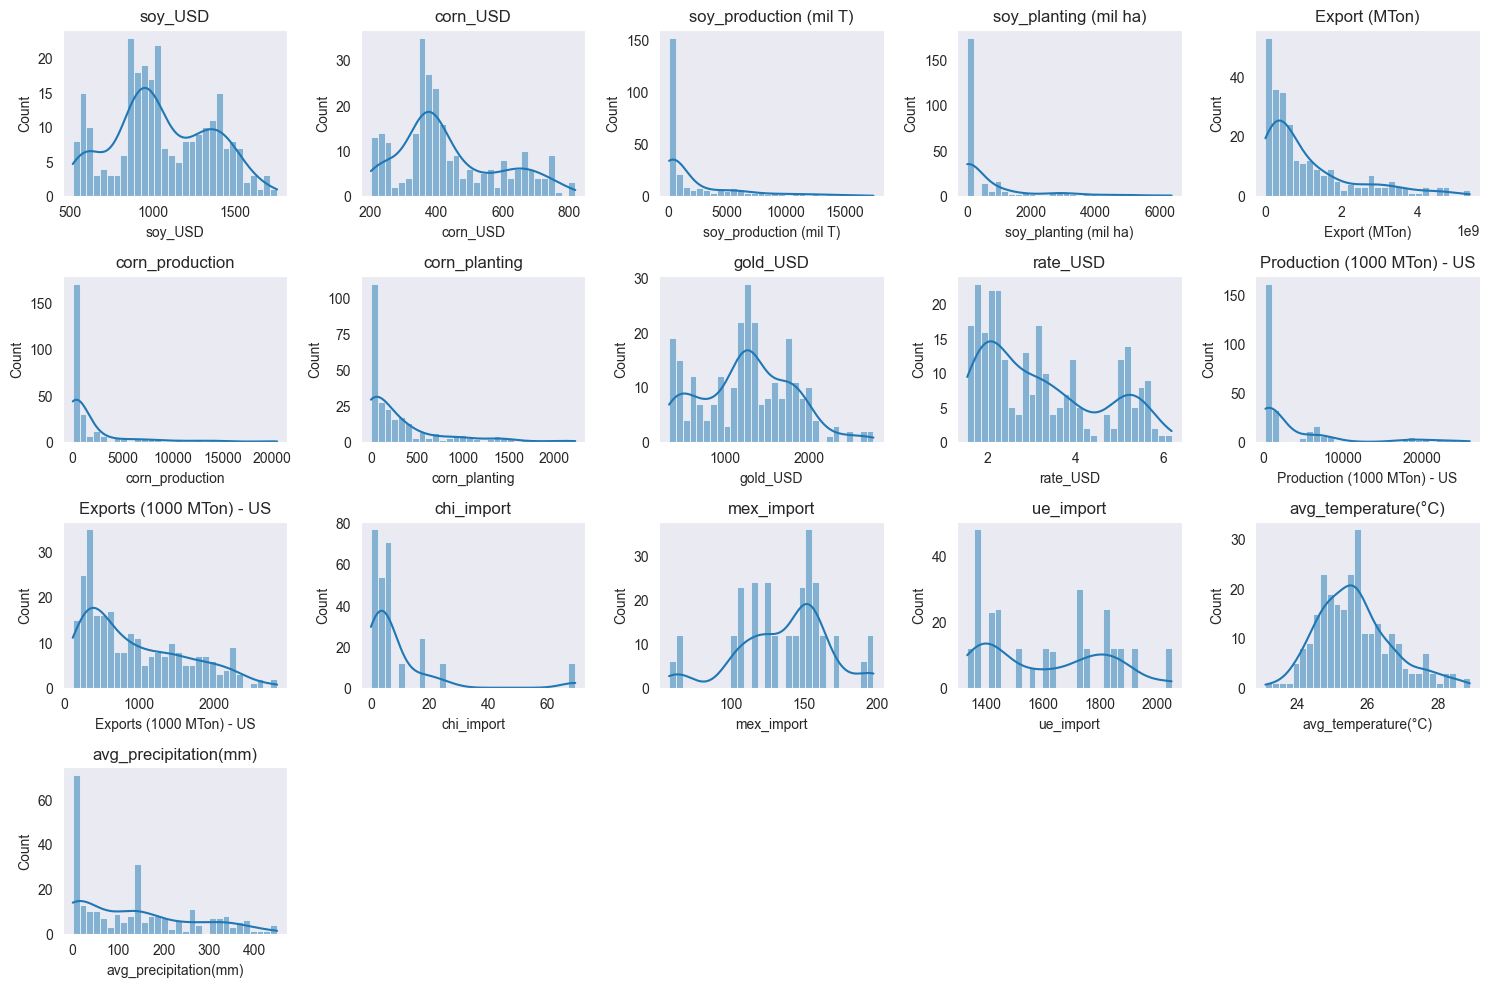

In [7]:

num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()




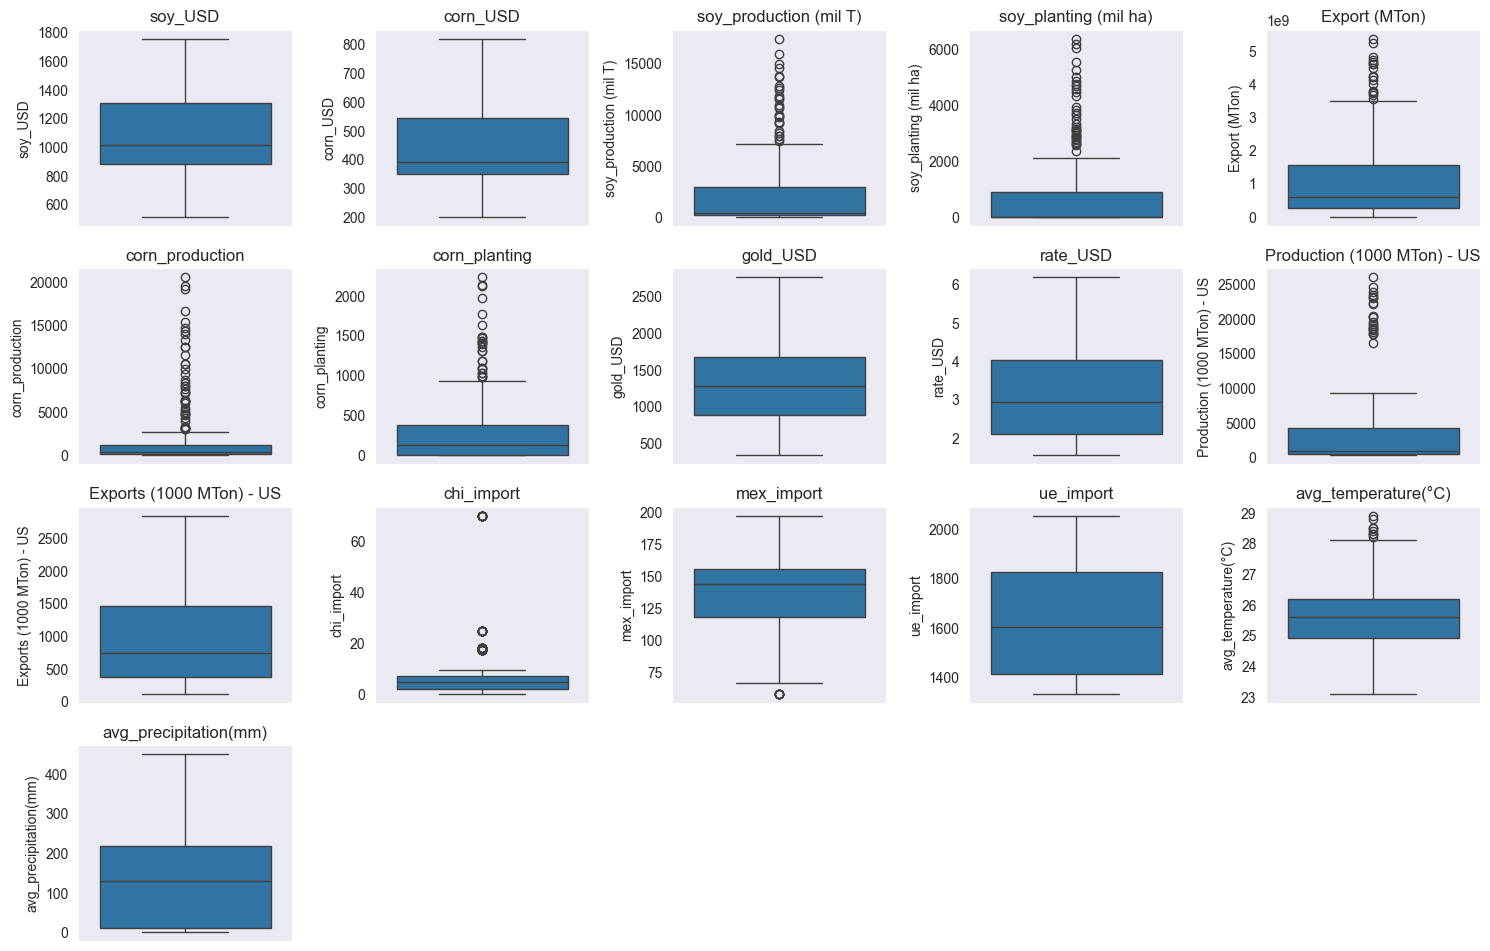

In [8]:

# Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col].dropna())
    plt.title(col)
plt.tight_layout()
plt.show()

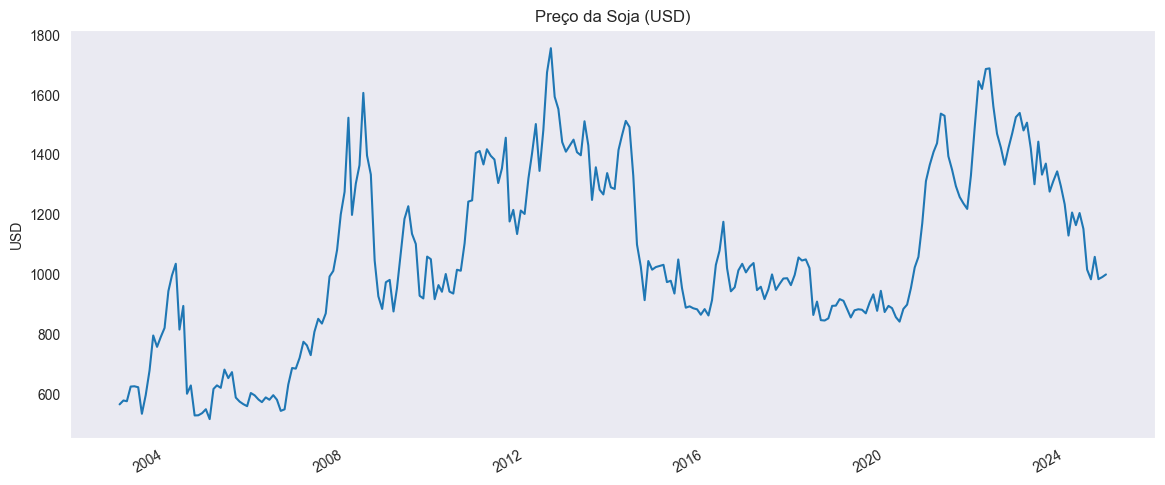

In [9]:

plt.figure(figsize=(14,6))
df['soy_USD'].plot(title='Preço da Soja (USD)')
plt.ylabel('USD')
plt.show()

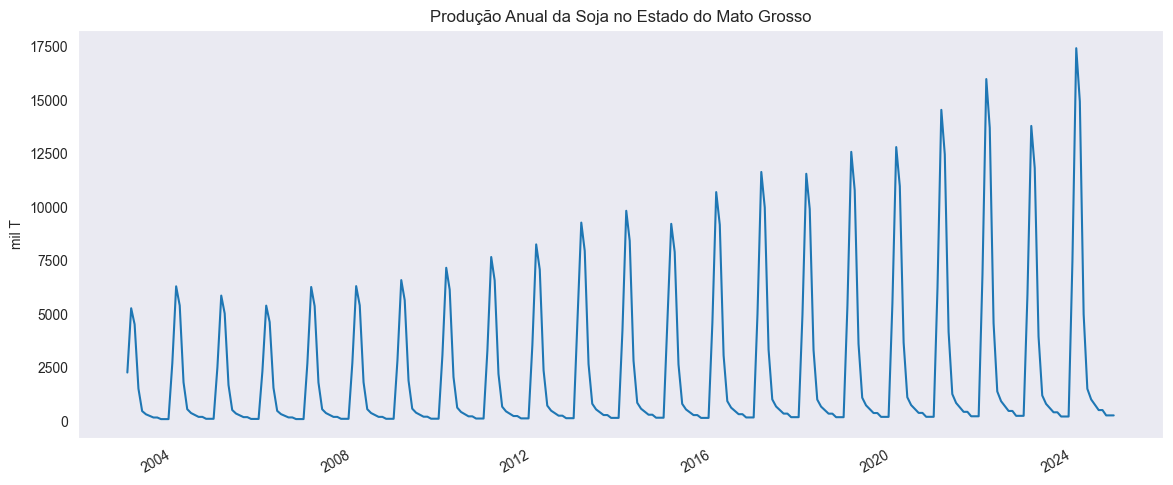

In [10]:

plt.figure(figsize=(14,6))
df['soy_production (mil T)'].plot(title='Produção Anual da Soja no Estado do Mato Grosso')
plt.ylabel('mil T')
plt.show()


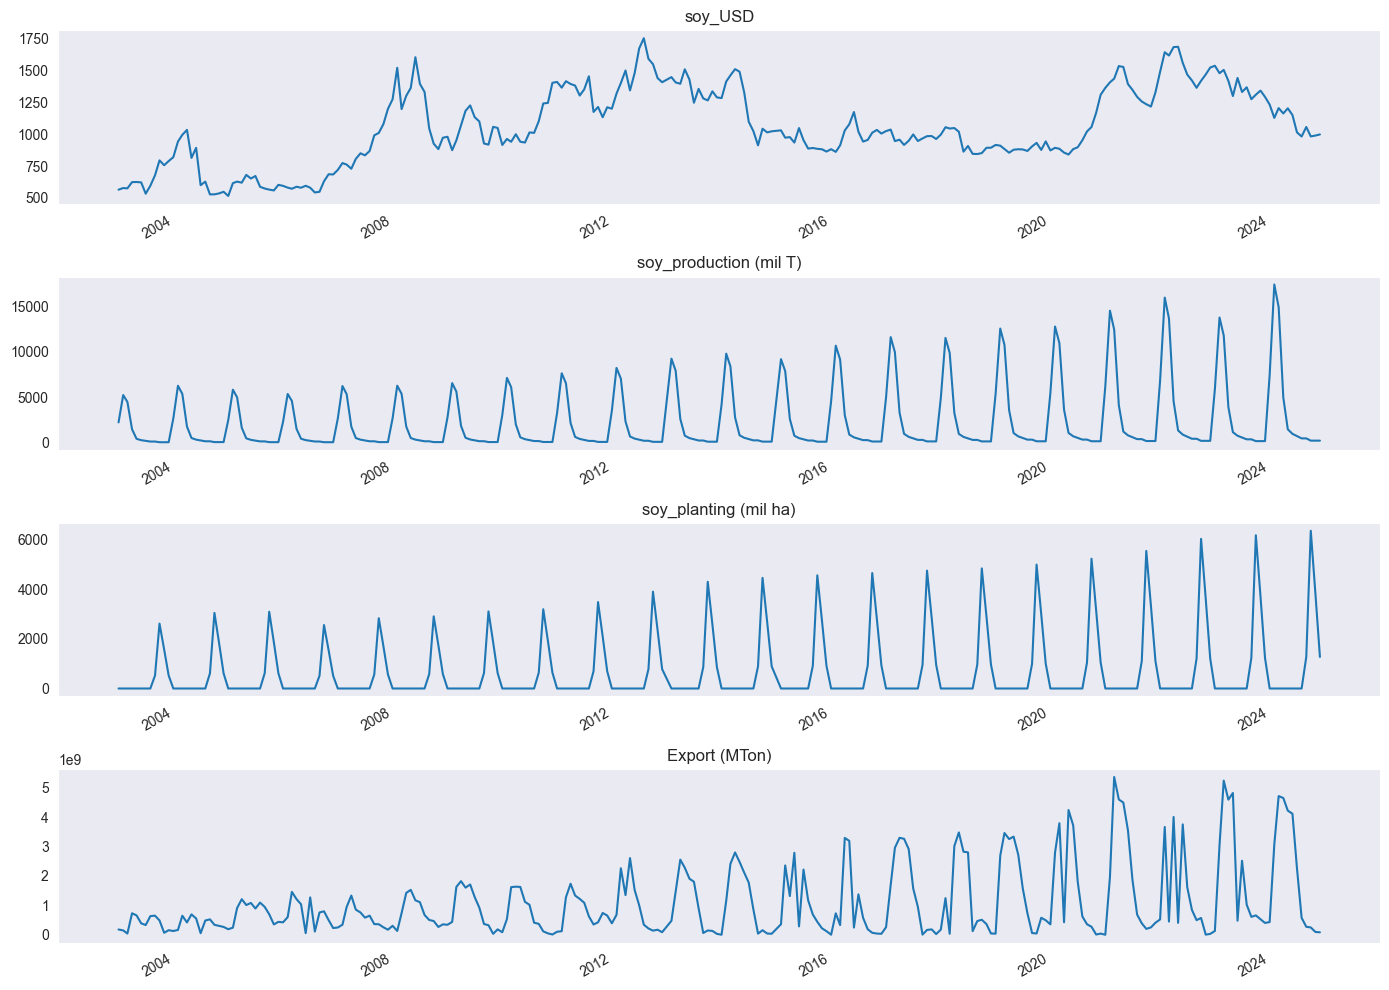

In [11]:

# Séries temporal de acompanhamento da soja do Estado de MT:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['soy_USD', 'soy_production (mil T)', 'soy_planting (mil ha)', 'Export (MTon)'], 1):
    plt.subplot(4,1,i)
    df[col].plot()
    plt.title(col)
plt.tight_layout()
plt.show()


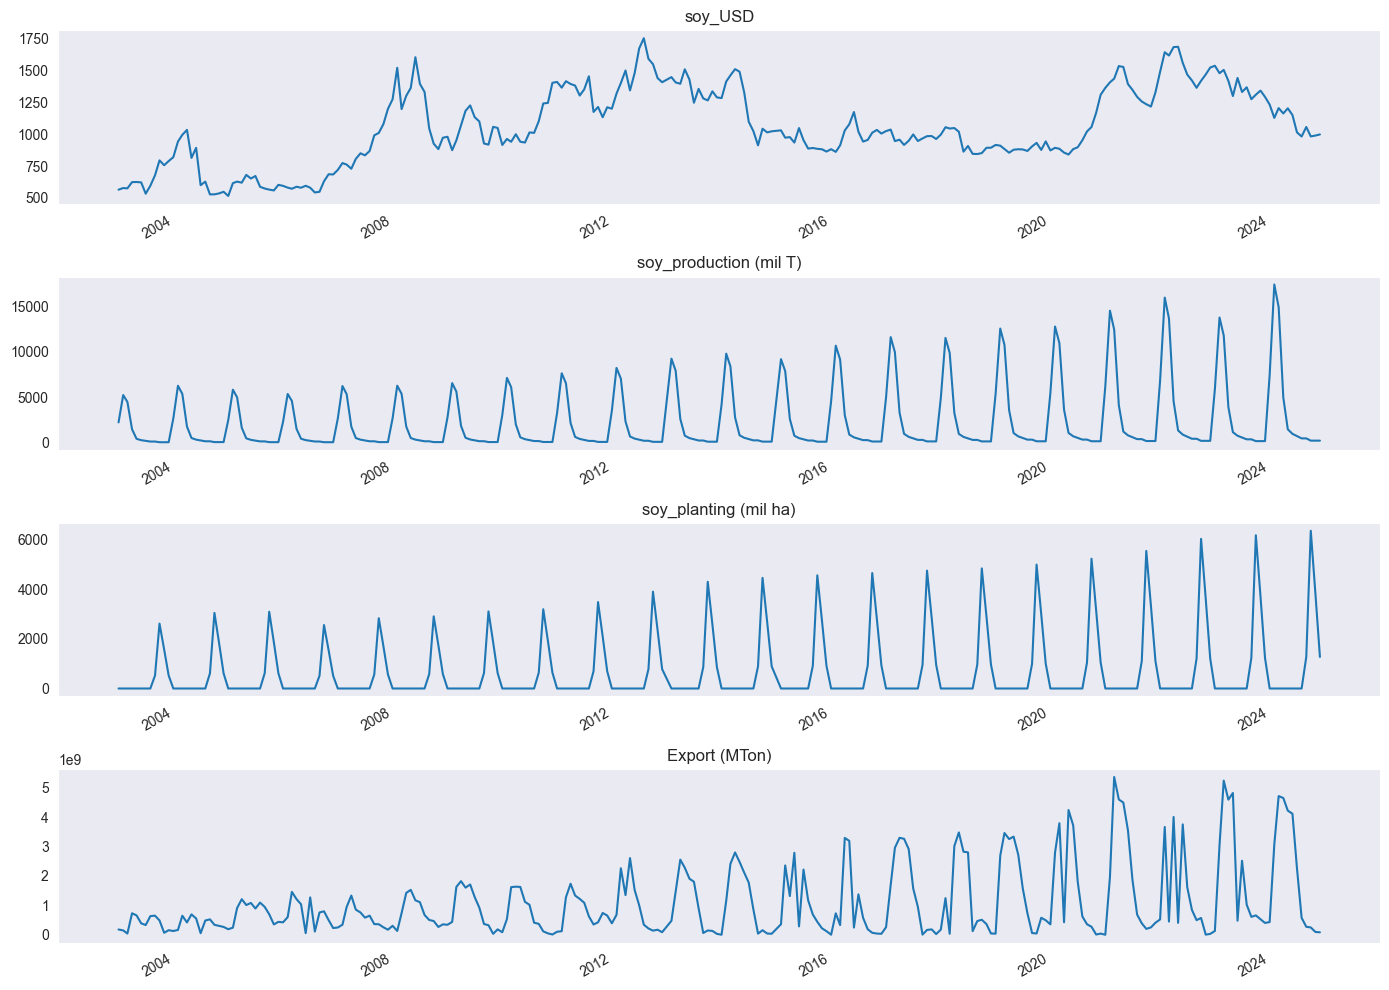

In [12]:

# Séries temporal de acompanhamento da soja do Estado de MT:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['soy_USD', 'soy_production (mil T)', 'soy_planting (mil ha)', 'Export (MTon)'], 1):
    plt.subplot(4,1,i)
    df[col].plot()
    plt.title(col)
plt.tight_layout()
plt.show()

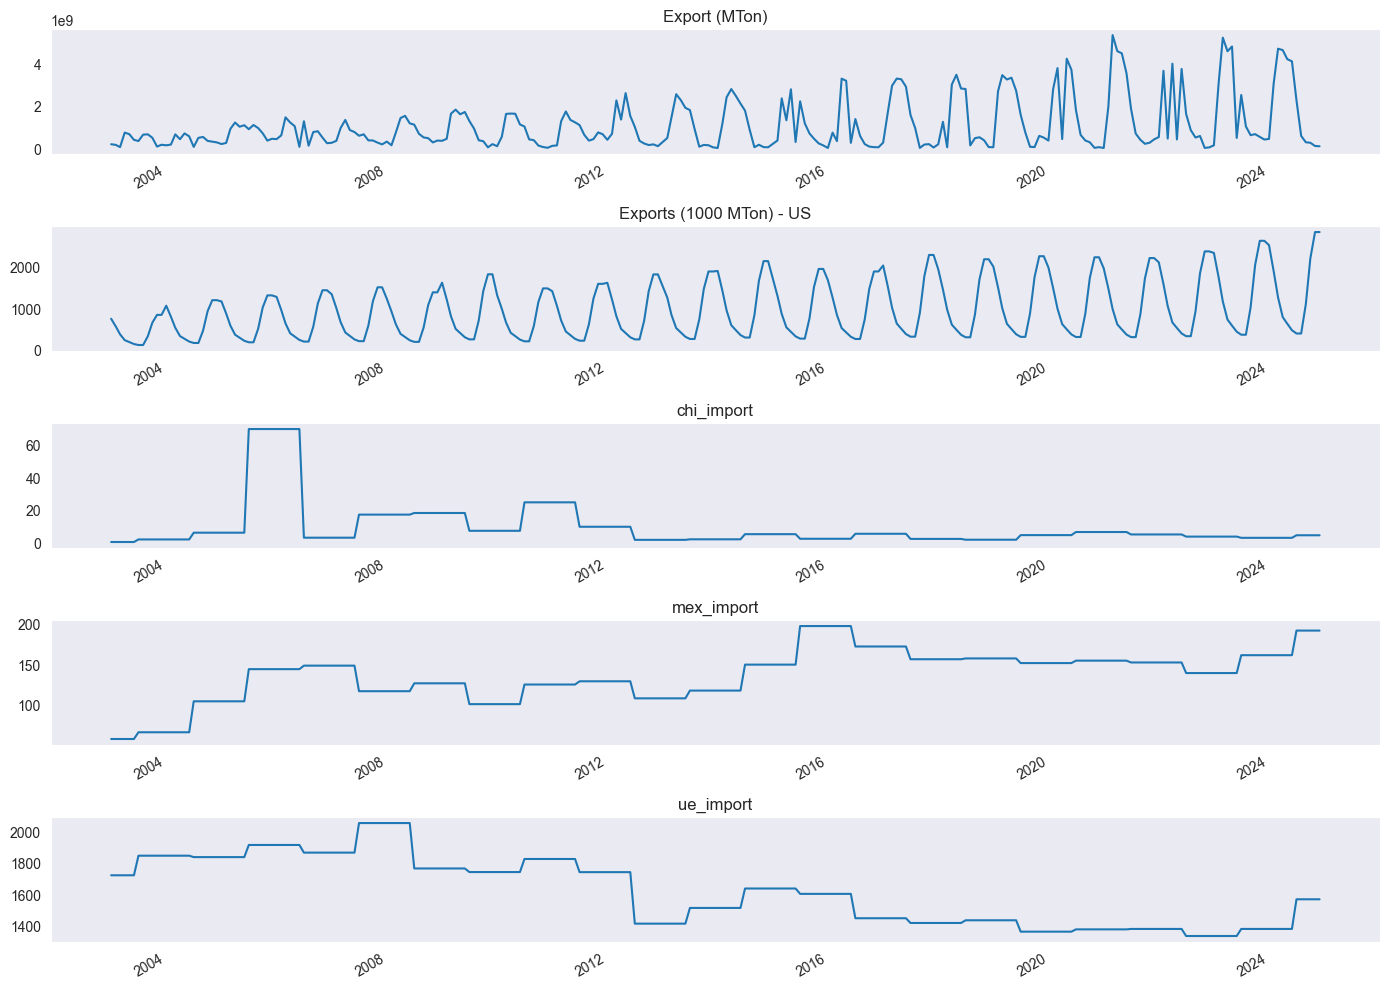

In [13]:

# Séries temporal de acompanhamento da soja internacional:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Export (MTon)', 'Exports (1000 MTon) - US', 'chi_import','mex_import','ue_import'], 1):
    plt.subplot(5,1,i)
    df[col].plot()
    plt.title(col)
plt.tight_layout()
plt.show()

In [1]:

plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlação das Variáveis do DataFrame Unificado")
plt.show()

NameError: name 'plt' is not defined

In [15]:

#Melhores correlações:
corr2 = df.corr()
corr_target = corr2['soy_USD'].drop('soy_USD').sort_values(ascending=False)
print("Top correlações com preço da soja:\n", corr2.head(10))


Top correlações com preço da soja:
                               soy_USD  corn_USD  soy_production (mil T)  \
soy_USD                      1.000000  0.907439                0.166659   
corn_USD                     0.907439  1.000000                0.133230   
soy_production (mil T)       0.166659  0.133230                1.000000   
soy_planting (mil ha)       -0.000422  0.007090               -0.314720   
Export (MTon)                0.230306  0.188966                0.342536   
corn_production              0.173154  0.118753               -0.186366   
corn_planting                0.214596  0.181123                0.865220   
gold_USD                     0.661725  0.610461                0.160470   
rate_USD                     0.154226  0.075149                0.172848   
Production (1000 MTon) - US -0.048506 -0.023751               -0.234911   

                             soy_planting (mil ha)  Export (MTon)  \
soy_USD                                  -0.000422       0.230306   


In [16]:

# Menores correlações:
print("\nMenor correlações:\n", corr2.tail(10))


Menor correlações:
                               soy_USD  corn_USD  soy_production (mil T)  \
corn_planting                0.214596  0.181123                0.865220   
gold_USD                     0.661725  0.610461                0.160470   
rate_USD                     0.154226  0.075149                0.172848   
Production (1000 MTon) - US -0.048506 -0.023751               -0.234911   
Exports (1000 MTon) - US     0.133959  0.112830                0.174011   
chi_import                  -0.243500 -0.159943               -0.089759   
mex_import                   0.085617  0.070412                0.093034   
ue_import                   -0.428639 -0.316374               -0.196985   
avg_temperature(°C)         -0.081335 -0.083057               -0.055267   
avg_precipitation(mm)        0.083798  0.096919                0.452682   

                             soy_planting (mil ha)  Export (MTon)  \
corn_planting                             0.068259       0.130417   
gold_USD       

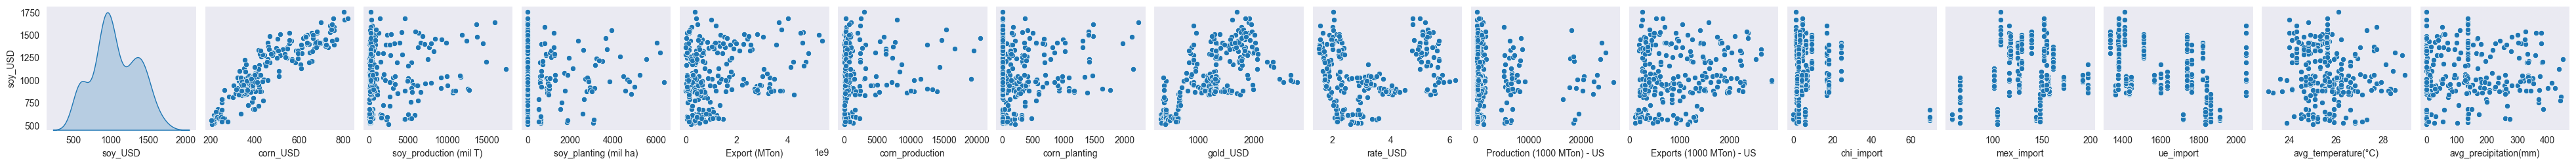

In [17]:

# Pairplot em relação a soy_USD:
sns.pairplot(df, diag_kind='kde', y_vars=['soy_USD'])

In [18]:

#Melhores e piores correlações a soy_USD:
corr1 = df.corr().copy()
corr_target = corr1['soy_USD'].drop('soy_USD').sort_values(ascending=False)
print("Top correlações com preço da soja:\n", corr_target.head(10))
print("\nMenor correlações:\n", corr_target.tail(10))


Top correlações com preço da soja:
 corn_USD                    0.907439
gold_USD                    0.661725
Export (MTon)               0.230306
corn_planting               0.214596
corn_production             0.173154
soy_production (mil T)      0.166659
rate_USD                    0.154226
Exports (1000 MTon) - US    0.133959
mex_import                  0.085617
avg_precipitation(mm)       0.083798
Name: soy_USD, dtype: float64

Menor correlações:
 soy_production (mil T)         0.166659
rate_USD                       0.154226
Exports (1000 MTon) - US       0.133959
mex_import                     0.085617
avg_precipitation(mm)          0.083798
soy_planting (mil ha)         -0.000422
Production (1000 MTon) - US   -0.048506
avg_temperature(°C)           -0.081335
chi_import                    -0.243500
ue_import                     -0.428639
Name: soy_USD, dtype: float64


### 2.3 Modify


   * Limpeza (tratamento de dados ausentes, outliers).
   * Engenharia de variáveis: lags, médias móveis, features climáticas agregadas.
   * Transformações (log, diferenciações sazonais), normalização e codificação.



Partição entre validação, treino e teste:

In [19]:

## Partição do dataframe:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#Carregar o dataframe consolidado (df2.csv exportado por você)
#df = pd.read_csv('df2.csv', parse_dates=['Date']).set_index('Date')

#Gerar lags (ex.: 1 a 6 meses) da variável-alvo
target_col = 'soy_USD'
for lag in range(1, 7):
    df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)

#Remover linhas com NaN criadas pelos lags
df = df.dropna().copy()

# Separar validação (Safras 23/24 e 24/25)
df_val = df.loc['2023-06-01':'2025-12-31'].copy()
df_rest = df.loc[:'2023-12-31'].copy()

# Dividir df_rest em treino (80%) e teste (20%) de forma aleatória e reprodutível
df_train, df_test = train_test_split(
    df_rest,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Separar as partições já existentes em features (X) e target (y):
X_train, y_train = df_train.drop(columns=[target_col]).copy(), df_train[target_col].copy()
X_test,  y_test  = df_test.drop(columns=[target_col]).copy(),  df_test[target_col].copy()
X_val,   y_val   = df_val.drop(columns=[target_col]).copy(),   df_val[target_col].copy()

# Checando as partições
print("Tamanho total do dataframe:",df.shape)
print("Dados separados para Validação referentes as Safras 2023/24 e 2024/25:", df_val.shape )
print("80% dos Dados restantes separados para Treino:", df_train.shape)
print("20% dos Dados restantes separados para Teste:", df_test.shape)



Tamanho total do dataframe: (256, 22)
Dados separados para Validação referentes as Safras 2023/24 e 2024/25: (19, 22)
80% dos Dados restantes separados para Treino: (195, 22)
20% dos Dados restantes separados para Teste: (49, 22)


### 2.4 Model


   * Seleção de técnicas: regressão (OLS, Ridge, Lasso), ML tradicional (RF, XGBoost), séries temporais (ARIMA/SARIMAX) e deep learning (LSTM, CNN)
   * Possível uso de ensemble e seleção via validação cruzada.



#### Linear Regression 

In [20]:

# Construir o pipeline
pipe_lin = Pipeline([
    ('scaler', StandardScaler()),     # boas práticas: padronizar evita viés numérico :contentReference[oaicite:6]{index=6}
    ('model',  LinearRegression())
])

# Treinar
pipe_lin.fit(X_train, y_train)




Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [21]:

# Avaliação:
def report(split, y_true, y_pred):
    print(f'{split:9s}MAE = {mean_absolute_error(y_true,y_pred):6.2f}'
        f'; RMSE = {np.sqrt(mean_squared_error(y_true, y_pred)):6.2f}'
        f' e R² = {r2_score(y_true,y_pred):6.3f}')

report('TESTE: ',       y_test, pipe_lin.predict(X_test))
report('VALIDAÇÃO: ',   y_val,  pipe_lin.predict(X_val))

TESTE:   MAE =  60.22; RMSE =  74.61 e R² =  0.942
VALIDAÇÃO: MAE =  72.96; RMSE =  91.65 e R² =  0.591


Ridge e Lasso

In [28]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1) Definindo o pipeline Ridge:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

# 2) Configurando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# 3) Definindo grid de parâmetros
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

# 4) GridSearch com validação temporal
search = GridSearchCV(pipe, param_grid, cv=tscv,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1)
search.fit(X_train, y_train)




GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1, param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [29]:

# 5) Avaliação nos conjuntos de teste e validação
def report(name, X, y):
    y_pred = search.predict(X)
    print(f"{name} → MAE: {mean_absolute_error(y,y_pred):.2f}, "
        f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}, "
        f"R²: {r2_score(y,y_pred):.3f}")

print("Melhor alpha:", search.best_params_)
report("TESTE", X_test, y_test)
report("VALIDAÇÃO", X_val, y_val)

Melhor alpha: {'model__alpha': 1}
TESTE → MAE: 60.66, RMSE: 74.62, R²: 0.942
VALIDAÇÃO → MAE: 72.75, RMSE: 92.21, R²: 0.586


In [30]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1) Definindo o pipeline Ridge:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso()) 
])

# 2) Configurando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# 3) Definindo grid de parâmetros
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

# 4) GridSearch com validação temporal
search = GridSearchCV(pipe, param_grid, cv=tscv,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1)
search.fit(X_train, y_train)




GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1, param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [31]:

# 5) Avaliação nos conjuntos de teste e validação
def report(name, X, y):
    y_pred = search.predict(X)
    print(f"{name} → MAE: {mean_absolute_error(y,y_pred):.2f}, "
        f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}, "
        f"R²: {r2_score(y,y_pred):.3f}")

print("Melhor alpha:", search.best_params_)
report("TESTE", X_test, y_test)
report("VALIDAÇÃO", X_val, y_val)

Melhor alpha: {'model__alpha': 10}
TESTE → MAE: 59.32, RMSE: 72.01, R²: 0.946
VALIDAÇÃO → MAE: 57.20, RMSE: 68.52, R²: 0.772


Random Forest

In [37]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pipeline
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# TimeSeriesSplit (respeitando ordem temporal)
tscv = TimeSeriesSplit(n_splits=5)

# Grade de hiperparâmetros
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10],
    'model__max_features': ['sqrt', 'log2']
}

# Grid Search com validação temporal
grid_rf = GridSearchCV(pipe_rf, param_grid, cv=tscv,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Melhor combinação :", grid_rf.best_params_)


Melhor combinação : {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 100}


In [ ]:

# Função de relatório resumido
def report(name, X, y):
    y_pred = grid_rf.predict(X)
    print(f"{name:10s} → MAE: {mean_absolute_error(y, y_pred):.2f} | "
        f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f} | "
        f"R²: {r2_score(y, y_pred):.3f}")

report("TESTE",     X_test, y_test)
report("VALIDAÇÃO", X_val,  y_val)


TESTE      → MAE: 52.97 | RMSE: 71.49 | R²: 0.947
VALIDAÇÃO  → MAE: 82.81 | RMSE: 101.86 | R²: 0.495


XGBoost

In [48]:

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.pipeline        import Pipeline
from xgboost                 import XGBRegressor
from sklearn.metrics         import mean_absolute_error, mean_squared_error, r2_score
import joblib, numpy as np

# 3.1  Pipeline: escala → modelo
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  XGBRegressor(
        objective="reg:squarederror",  # regressão
        n_jobs=-1,                     # paralelismo CPU
        random_state=42,
        tree_method="hist"             # use "cuda_hist" se quiser GPU
    ))
])

# 3.2  Esquema de CV temporal (5 splits progressivos)
tscv = TimeSeriesSplit(n_splits=5)

# 3.3  Grade de hiperparâmetros essenciais
param_grid = {
    "model__n_estimators":   [200, 400, 600],
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__max_depth":     [3, 5, 7],
    "model__min_child_weight": [1, 5],
    "model__subsample":     [0.7, 1.0],
    "model__colsample_bytree": [0.7, 1.0]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv      = tscv,
    scoring = "neg_root_mean_squared_error",
    n_jobs  = -1,
    verbose = 1
)
grid.fit(X_train, y_train)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=No...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.7, 1.0],
                         'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__min_child_weight': [1, 5],
                         'model__n_estimators': [200, 400, 600],
                         'model__subsample': [0.7, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [46]:

print("Melhor configuração:", grid.best_params_)
def metrics(y_true, y_pred, nome):
    print(f"{nome:10s}  MAE={mean_absolute_error(y_true,y_pred):6.2f}  "
        f"RMSE={np.sqrt(mean_squared_error(y_true, y_pred)):6.2f}  "
        f"R²={r2_score(y_true,y_pred):6.3f}")

metrics(y_test, grid.predict(X_test), "TESTE")
metrics(y_val,  grid.predict(X_val),  "VALIDAÇÃO")

Melhor configuração: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 200, 'model__subsample': 0.7}
TESTE       MAE= 52.29  RMSE= 73.84  R²= 0.943
VALIDAÇÃO   MAE= 73.35  RMSE= 94.64  R²= 0.564


In [49]:
from sklearn.inspection import permutation_importance

imp = permutation_importance(
    grid.best_estimator_,
    X_val, y_val,
    n_repeats=30,
    random_state=42,
    scoring="neg_root_mean_squared_error"
)

importances = (
    pd.Series(imp.importances_mean, index=X_val.columns)
    .sort_values(ascending=False)
)
print(importances.head(15))


soy_USD_lag1                87.383422
corn_USD                    27.239205
soy_USD_lag2                 2.231661
avg_temperature(°C)          1.146820
gold_USD                     0.751421
corn_production              0.658360
soy_USD_lag6                 0.125683
soy_planting (mil ha)        0.056517
ue_import                   -0.039163
chi_import                  -0.054815
mex_import                  -0.204250
corn_planting               -0.234225
soy_USD_lag5                -0.670188
Exports (1000 MTon) - US    -0.965489
rate_USD                    -1.181829
dtype: float64


### 2.5 Assess


   * Comparação de modelos via MSE, MAE, RMSE.
   * Validação com dados da safra mais recente.
   * Avaliação de variáveis mais impactantes (importância das features).

## 3. Conclusão 